#### **Projeto de Regressão Linear: Pontuação no Mope.io**

Esse modelo tende a observar dados vindos de supostos jogadores do jogo Mope.io considerando alguns preditores relevantes e nosso objetivo é tentar fazer uma regressão linear para prever a pontuação esperada de novos jogadores dados os valores em seus preditores. Os dados obtidos nesse caso não serão dados reais, mas sim dados gerados de forma aleatória de forma que não tenhamos conhecimento sobre quais os seus valores exatos. Os preditores considerados são:

- Número de partidas jogadas - numérico: $x \in \mathbb{Z}^+$
- Número de pessoas no servidor - numérico: $x \in \mathbb{Z}^+$
- Número de vezes que entrou em PVP - numérico: $x \in \mathbb{Z}^+$
- Número de vezes que tentou caçar uma presa - numérico: $x \in \mathbb{Z}^+$
- Número de vezes que tentou fugir de um predador - numérico: $x \in \mathbb{Z}^+$
- Bioma preferido - categórico: $x \in \{\text{Terra, Oceano, Ártico, Deserto, Vulcão}\}$

Dados os preditores, configuraremos um gerador que gera valores aleatórios para os coeficientes reais de cada preditor. Para gerar os dados sem sabermos previamente a resposta correta, usaremos um código Python que gera valores aleatórios para os coeficientes reais sem nosso conhecimento, pois são os valores que queremos descobrir só com as observações. Criaremos dois modelos que configuram complexidades diferentes de ambiente. O primeiro é um modelo linear com os seguintes coeficientes:

**Coeficientes:**
- Constante ~ $U(1000,30000)$
- Número de partidas jogadas ~ $U(0,50000)$
- Número de pessoas no servidor ~ $U(-100,500)$
- Número de vezes que entrou em PVP ~ $N(40000,20000)$
- Número de vezes que tentou caçar uma presa ~ $N(10000,4000)$
- Número de vezes que tentou fugir de um predador ~ $N(7000,2000)$
- Preferir Oceano em relação à Terra ~ $N(0,100000)$
- Preferir Ártico em relação à Terra ~ $N(0,100000)$
- Preferir Deserto em relação à Terra ~ $N(0,100000)$
- Preferir Vulcão em relação à Terra ~ $N(0,100000)$

Por fim, os dados observados serão vistos aleatoriamente segundo as seguintes distribuições:

**Distribuições:**
- Número de partidas jogadas anteriormente ~ $Gamma(0.5,10)$
- Número de pessoas no servidor ~ $Gamma(7,10)$
- Número de vezes que entrou em PVP ~ $Gamma(1,2)$
- Número de vezes que tentou caçar uma presa ~ $Gamma(2,5)$
- Número de vezes que tentou fugir de um predador ~ $Gamma(2,5)$
- Bioma Preferido ~ $U(\{\text{Terra, Oceano, Ártico, Deserto, Vulcão}\})$

In [1]:
import sklearn
import numpy as np
import pandas as pd
from pathlib import Path
import scipy.stats as sci
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.stats as sci
import pandas as pd

beta = []
data = []
Seed = 5363

# Modelo Linear Puro
def generate_data(n = 1000, errorlevel = 1000, seed=None):
    global beta, data
    
    # Cria um gerador de números aleatórios com a semente
    if seed is not None:
        rng = np.random.RandomState(seed)
    else:
        rng = np.random.RandomState()
        
    # Gera os coeficientes reais
    beta = [
        float(sci.uniform.rvs(1000, 30000, random_state=rng)), #b0
        float(sci.uniform.rvs(0, 50000, random_state=rng)),    #b1 * partidas
        float(sci.uniform.rvs(-100, 500, random_state=rng)),   #b2 * pessoas
        float(sci.norm.rvs(40000, 20000, random_state=rng)),   #b3 * pvp
        float(sci.norm.rvs(10000, 4000, random_state=rng)),    #b4 * caça
        float(sci.norm.rvs(7000, 2000, random_state=rng)),     #b5 * fuga
        float(sci.norm.rvs(0, 100000, random_state=rng)),      #b6 * prefOceano
        float(sci.norm.rvs(0, 100000, random_state=rng)),      #b7 * prefArtico
        float(sci.norm.rvs(0, 100000, random_state=rng)),      #b8 * prefDeserto
        float(sci.norm.rvs(0, 100000, random_state=rng)),      #b9 * prefVulcao
    ]
    
    # Gera as N observações junto com o XP final segundo os coeficientes reais + erro aleatório N(0,1000)
    v = {
        'partidas': [round(sci.gamma.rvs(a=0.5, scale=15, random_state=rng)) for _ in range(n)],
        'pessoas': [round(sci.gamma.rvs(a=7, scale=10, random_state=rng)) for _ in range(n)],
        'pvp': [round(sci.gamma.rvs(a=1, scale=2, random_state=rng)) for _ in range(n)],
        'caça': [round(sci.gamma.rvs(a=2, scale=12, random_state=rng)) for _ in range(n)],
        'fuga': [round(sci.gamma.rvs(a=2, scale=12, random_state=rng)) for _ in range(n)],
        'pref': [["Terra","Água","Ártico","Deserto","Vulcão"][rng.randint(low=0,high=5)] for _ in range(n)],
        'xp': [0 for _ in range(n)]
    }
    
    # Calcula o XP de acordo com a fórmula e agrega um erro aleatório
    for i in range(n):
        v['xp'][i] = round(max(0,beta[0] + beta[1]*v['partidas'][i] + beta[2]*v['pessoas'][i] + beta[3]*v['pvp'][i] + beta[4]*v['caça'][i] + beta[5]*v['fuga'][i] + beta[6]*(v['pref'][i] == 'Água') + beta[7]*(v['pref'][i] == 'Ártico') + beta[8]*(v['pref'][i] == 'Deserto') + beta[9]*(v['pref'][i] == 'Vulcão') + sci.norm.rvs(0, errorlevel, random_state=rng)))
        
    # Retorna um dataframe com esses dados
    data = pd.DataFrame(v)
    return data
    
generate_data()

,partidas,pessoas,pvp,caça,fuga,pref,xp
0,2,76,1,18,52,Ártico,483499
1,1,86,2,31,19,Vulcão,564174
2,1,74,3,33,44,Terra,677491
3,8,164,0,22,22,Vulcão,715088
4,5,92,4,42,30,Água,777113
...,...,...,...,...,...,...,...
995,0,49,0,19,15,Deserto,287006
996,2,87,5,19,21,Água,475199
997,11,55,1,31,30,Ártico,688012
998,0,79,0,44,25,Ártico,392005


Já o segundo modelo assume tudo do primeiro, mas também cria de um até três termos de interação entre dois coeficientes quaisquer do modelo:

**Coeficientes de Iteração:**
- Quantidade de termos de intearção ~ $U(1,3)$
- Interação(X,Y) ~ $N(0,300)$

In [3]:
import numpy as np
import scipy.stats as sci
import pandas as pd

beta = []
data = []

# Modelo Linear com Interações
def generate_advanced_data(n = 1000, errorlevel = 1000, seed = None):
    global beta, data
    
    # Cria um gerador de números aleatórios com a semente
    if seed is not None:
        rng = np.random.RandomState(seed)
    else:
        rng = np.random.RandomState()

    # Gera os coeficientes reais
    beta = [
        float(rng.uniform(1000,30000)), #b0
        float(rng.uniform(0,50000)),    #b1 * partidas
        float(rng.uniform(-100,500)),   #b2 * pessoas
        float(rng.normal(40000,20000)), #b3 * pvp
        float(rng.normal(10000,4000)),  #b4 * caça
        float(rng.normal(7000,2000)),   #b5 * fuga
        float(rng.normal(0,100000)),    #b6 * prefOceano
        float(rng.normal(0,100000)),    #b7 * prefArtico
        float(rng.normal(0,100000)),    #b8 * prefDeserto
        float(rng.normal(0,100000)),    #b9 * prefVulcao
    ]
    
    # Gera as N observações junto com o XP final segundo os coeficientes reais + erro aleatório N(0,1000)
    v = {
        'partidas': [round(sci.gamma.rvs(a=0.5, scale=15, random_state=rng)) for _ in range(n)],
        'pessoas': [round(sci.gamma.rvs(a=7, scale=10, random_state=rng)) for _ in range(n)],
        'pvp': [round(sci.gamma.rvs(a=1, scale=2, random_state=rng)) for _ in range(n)],
        'caça': [round(sci.gamma.rvs(a=2, scale=12, random_state=rng)) for _ in range(n)],
        'fuga': [round(sci.gamma.rvs(a=2, scale=12, random_state=rng)) for _ in range(n)],
        'pref': [["Terra","Água","Ártico","Deserto","Vulcão"][rng.randint(low=0, high=5)] for _ in range(n)],
        'xp': [0 for _ in range(n)]
    }
    
    k = rng.randint(low=1,high=4)
    opt = ['partidas','pessoas','pvp','caça','fuga']
    itr = [0]*n
    for i in range(k):
        a = rng.randint(low=0, high=5)
        b = rng.randint(low=0, high=4)
        if(b >= a): b += 1
        beta.append([sci.norm.rvs(600,300,random_state=rng), opt[a], opt[b]])
        itr = [itr[j] + beta[10+i][0]*v[opt[a]][j]*v[opt[b]][j] for j in range(n)]
    
    # Calcula o XP de acordo com a fórmula e agrega um erro aleatório
    for i in range(n):
        v['xp'][i] = round(max(0,beta[0] + beta[1]*v['partidas'][i] + beta[2]*v['pessoas'][i] + beta[3]*v['pvp'][i] + beta[4]*v['caça'][i] + beta[5]*v['fuga'][i] + beta[6]*(v['pref'][i] == 'Água') + beta[7]*(v['pref'][i] == 'Ártico') + beta[8]*(v['pref'][i] == 'Deserto') + beta[9]*(v['pref'][i] == 'Vulcão') + itr[i] + rng.normal(0,errorlevel))+round(rng.uniform(0,300)))
        
    data = pd.DataFrame(v)
    return data

generate_advanced_data()

,partidas,pessoas,pvp,caça,fuga,pref,xp
0,24,69,1,9,31,Ártico,1102883
1,11,60,1,25,17,Água,905444
2,0,84,1,17,42,Terra,519584
3,2,50,0,28,23,Vulcão,428931
4,2,49,3,18,15,Água,626242
...,...,...,...,...,...,...,...
995,38,62,2,48,10,Vulcão,1883555
996,33,65,1,14,16,Vulcão,1315893
997,11,56,0,60,33,Deserto,1300880
998,10,94,1,24,47,Deserto,1044737


Nesse exemplo, já temos os dados tratados. Vamos primeiro fazer alguns gráficos para entender visualmente os dados.

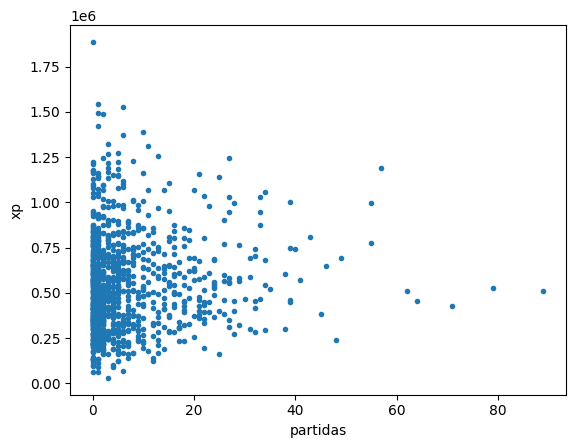

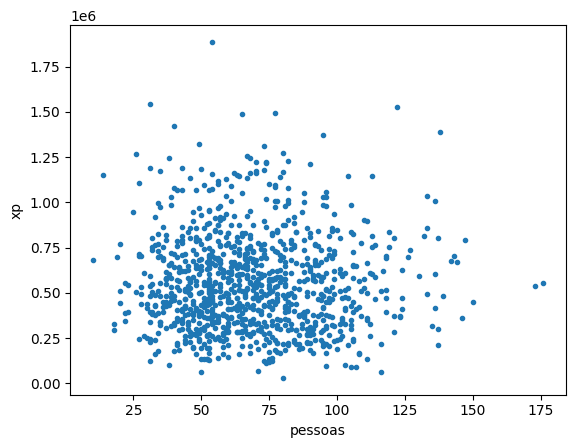

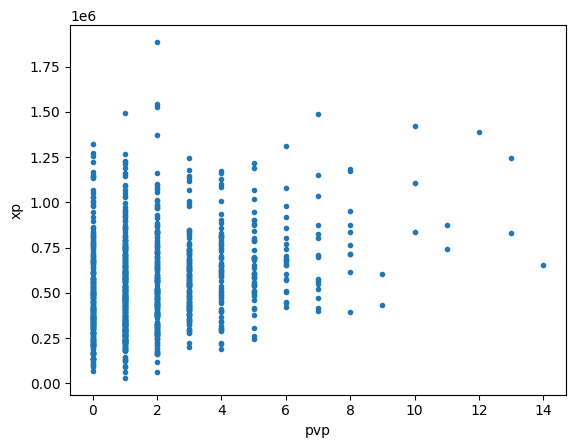

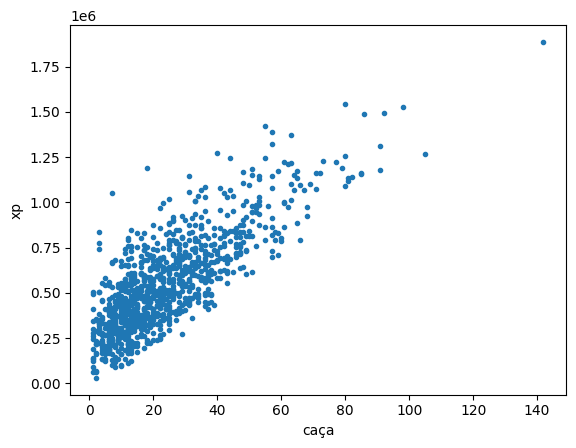

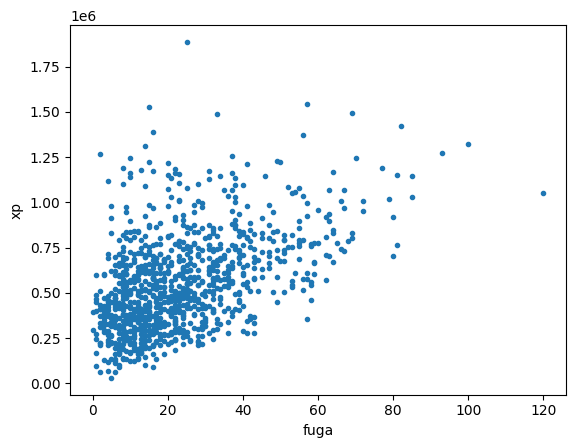

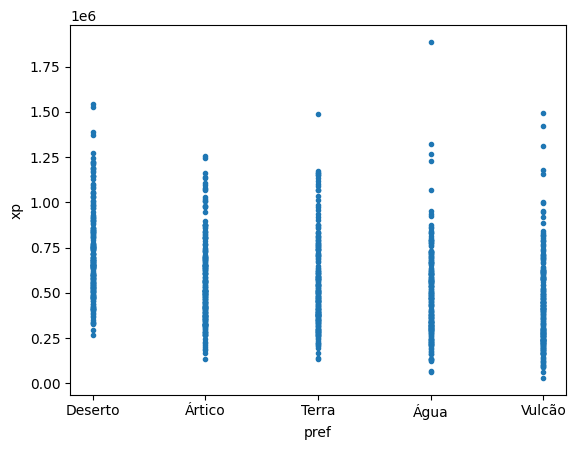

In [4]:
beta = []; data = []
generate_data(seed=Seed)

def graph(d1,d2='xp'):
    fig,ax = plt.subplots()
    ax.scatter(data[d1],data[d2],marker='.')
    ax.set_xlabel(d1)
    ax.set_ylabel(d2)
    plt.show()

graph('partidas')
graph('pessoas')
graph('pvp')
graph('caça')
graph('fuga')
graph('pref')

Veja que o dado de partidas parece ter uma influência linear muito forte. Além dele, podemos ver uma relação considerável em pvp e caça. Os coeficientes dos biomas parecem ter uma certa relação de impedirem um dado intervalo para mínimo de xp, indicando também uma relação linear quanto a essa variável categórica. Já os dados de fuga e pessoas parecem ter uma influência mais fraca na linearidade, indicando que possivelmente tem coeficientes mais baixos em relação aos valores apresentados.

Primeiro, vamos preparar nossos dados: Usar o pandas para usar o OneHotEncoding e separar dados em treino e teste.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Separando variáveis
categoricals = ['pref']
numericals = list(data.drop(columns=categoricals+['xp']).columns)
result = ['xp']
predictors = categoricals+numericals

# Dividir treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(data[predictors], data[result], test_size = 0.2, random_state=Seed)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Encoder
encoder = OneHotEncoder(categories=[['Terra','Água','Ártico','Deserto','Vulcão']],drop='first',sparse_output=False)
encoder.fit(X_train[categoricals])
new_categoricals = list(encoder.get_feature_names_out())

# Treino
Y = Y_train
X_num = X_train[numericals]
X_cat = encoder.transform(X_train[categoricals])
X = pd.DataFrame(np.hstack((X_num,X_cat)), columns = numericals+new_categoricals)

# Teste
Yt = Y_test
Xt_num = X_test[numericals]
Xt_cat = encoder.transform(X_test[categoricals])
Xt = pd.DataFrame(np.hstack((Xt_num,Xt_cat)), columns = numericals+new_categoricals)

E então, vamos tentar usar nosso modelo linear para ajustar os nossos dados:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# Análise para Scikit Learn
def summarize(Y_true,Y_pred):
    rmse = root_mean_squared_error(Y_true, Y_pred)
    mae = mean_absolute_error(Y_true,Y_pred)
    r2 = r2_score(Y_true, Y_pred)
    
    print('Avaliação do Teste - SkLearn:')
    print(f'RMSE: {rmse}\nMAE: {mae}\nR^2: {r2}\nMax Error: {max(abs(Y_true['xp']-Y_pred[:,0]))}\nMin Error: {min(abs(Y_true['xp']-Y_pred[:,0]))}')

# Regressão linear com Scikit Learn
model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(Xt)
summarize(Yt,Y_pred)

# Regressão linear com statsmodels
X_ = sm.add_constant(X) #Intercepto
Xt_ = sm.add_constant(Xt)
sm_model = sm.OLS(Y, X_).fit()
print(f'\n{sm_model.summary()}')

# Comparação de Coeficientes
print('-----------------------------------------------')
print(f'B0: T:{beta[0]:.2f}   vs   SK:{model.intercept_[0]:.2f}   vs   SM:{sm_model.params.iloc[0]:.2f}')
for i in range(1, 10):
    print(f'B{i}: T:{beta[i]:.2f}   vs   SK:{model.coef_[0][i-1]:.2f}   vs   SM:{sm_model.params.iloc[i]:.2f}')

Avaliação do Teste - SkLearn:
RMSE: 1157.8157093781203
MAE: 911.3456721633358
R^2: 0.9999793024913858
Max Error: 3814.6188285113312
Min Error: 1.4809072331991047

                            OLS Regression Results                            
Dep. Variable:                     xp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.117e+06
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        01:29:42   Log-Likelihood:                -6674.3
No. Observations:                 800   AIC:                         1.337e+04
Df Residuals:                     790   BIC:                         1.342e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t  

Com isso, concluímos nossa regressão linear! Veja que todos os coeficientes ficaram muito próximos, evidenciando que se houvesse realmnete uma relação linear nos dados, o modelo seria capaz de identificar essa relação com precisão. Vamos agora observar o que acontece no modelo com intercepto.

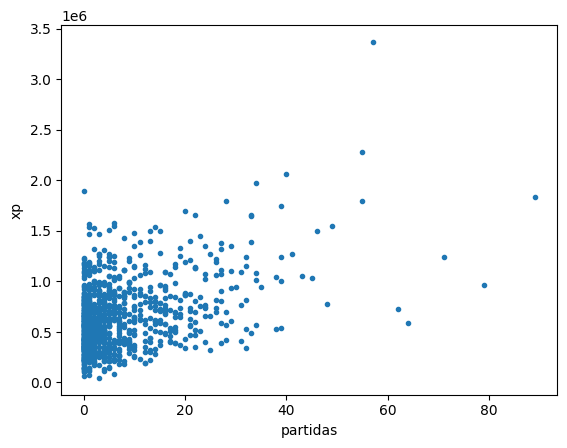

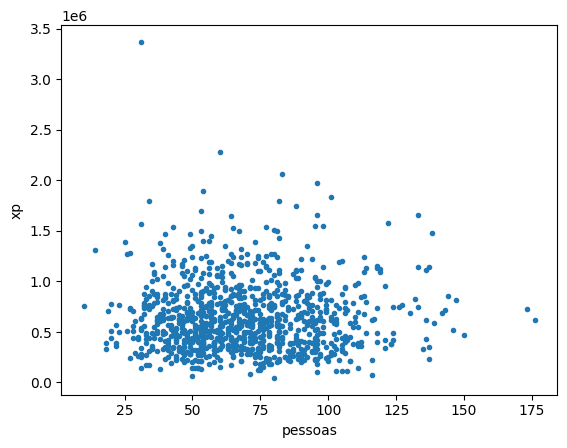

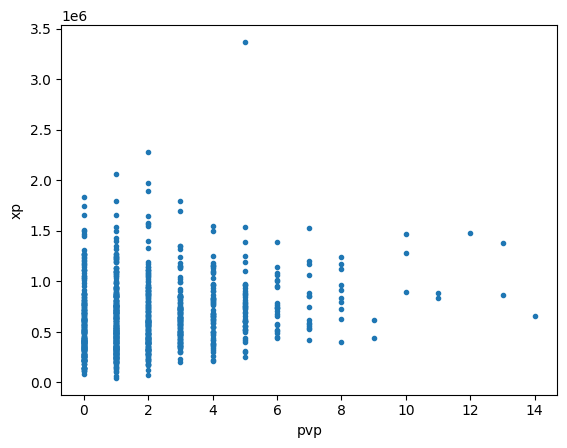

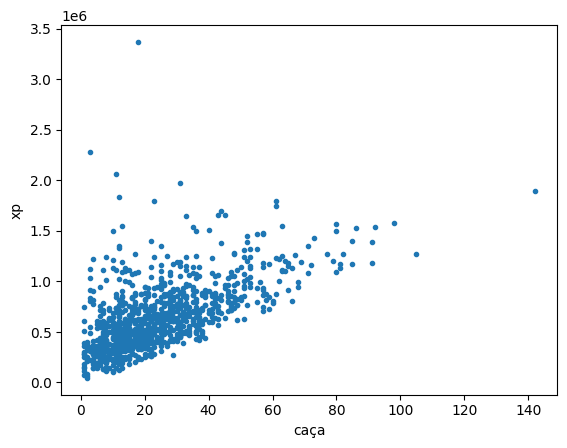

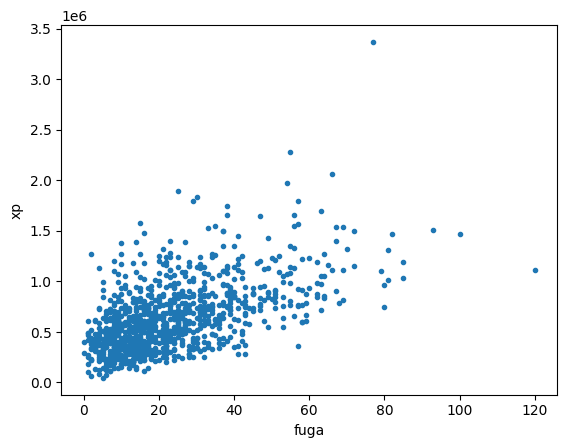

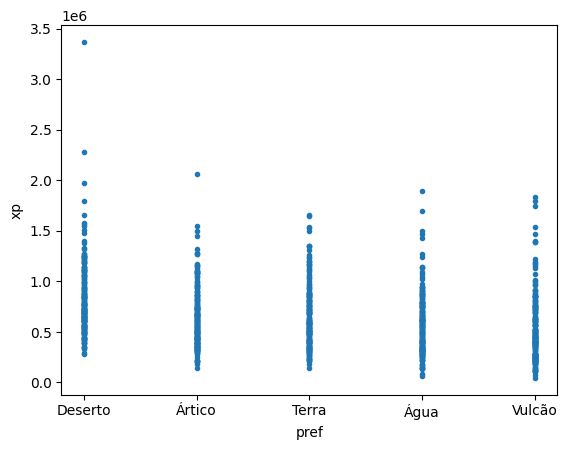

In [7]:
beta = []; data = []
generate_advanced_data(seed=Seed)

graph('partidas')
graph('pessoas')
graph('pvp')
graph('caça')
graph('fuga')
graph('pref')

Os dados parecem ainda bastante lineares: na verdade, parece haver ainda mais tendências lineares. Vamos ver o que acontece se tentarmos nossa regressão linear agora:

In [8]:
# Separando variáveis
categoricals = ['pref']
numericals = list(data.drop(columns=categoricals+['xp']).columns)
result = ['xp']
predictors = categoricals+numericals

# Dividir treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(data[predictors], data[result], test_size = 0.2, random_state=Seed)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Encoder
encoder = OneHotEncoder(categories=[['Terra','Água','Ártico','Deserto','Vulcão']],drop='first',sparse_output=False)
encoder.fit(X_train[categoricals])
new_categoricals = list(encoder.get_feature_names_out())

# Treino
Y = Y_train
X_num = X_train[numericals]
X_cat = encoder.transform(X_train[categoricals])
X = pd.DataFrame(np.hstack((X_num,X_cat)), columns = numericals+new_categoricals)

# Teste
Yt = Y_test
Xt_num = X_test[numericals]
Xt_cat = encoder.transform(X_test[categoricals])
Xt = pd.DataFrame(np.hstack((Xt_num,Xt_cat)), columns = numericals+new_categoricals)

# Regressão
model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(Xt)
summarize(Yt,Y_pred)

# Comparação de Coeficientes
print('-----------------------------------------------')
print(f'B0: T:{beta[0]:.2f}   vs   SK:{model.intercept_[0]:.2f}')
for i in range(1, 10):
    print(f'B{i}: T:{beta[i]:.2f}   vs   SK:{model.coef_[0][i-1]:.2f}')

Avaliação do Teste - SkLearn:
RMSE: 92639.18936429103
MAE: 46772.774717666805
R^2: 0.9257511188887232
Max Error: 703225.3911895775
Min Error: 71.91876542102545
-----------------------------------------------
B0: T:12339.92   vs   SK:-55902.18
B1: T:2611.18   vs   SK:15092.25
B2: T:403.58   vs   SK:384.66
B3: T:32271.42   vs   SK:30716.28
B4: T:11713.45   vs   SK:11519.18
B5: T:6490.28   vs   SK:9736.54
B6: T:-34076.18   vs   SK:-35925.75
B7: T:11380.55   vs   SK:9420.34
B8: T:146276.02   vs   SK:151898.38
B9: T:-104360.88   vs   SK:-108868.05


Dessa vez houveram erros muito maiores e alguns dos coeficientes tiveram estimativas muito distantes apesar de outros ainda possuirem valores próximos. Vamos tentar exibir algum outro preditor no gráfico com o coeficiente do preditor mais divergente: as partidas, exibindo o segundo preditor mais divergente: a fuga.

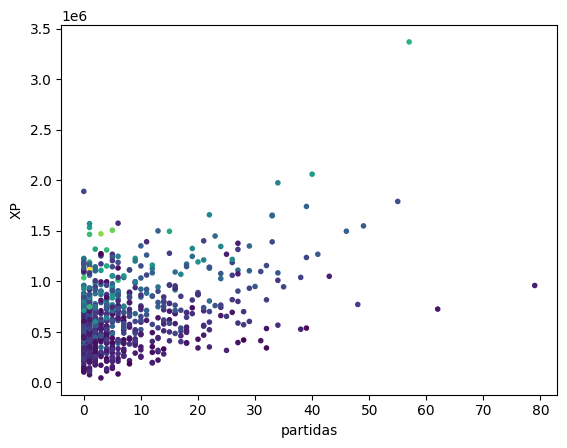

In [9]:
fig,ax = plt.subplots()
ax.scatter(X_train['partidas'],Y_train,marker='.',c=X_train['fuga'],cmap='viridis')
ax.set_xlabel('partidas')
ax.set_ylabel('XP')
plt.show()

Veja que há uma clara distinção de cores: os termos mais escuros estão se concentrando mais abaixo. Isso pode indicar que há uma interação negativa entre o número de fugas e o número de partidas previamente jogadas. Para modelar isso, vamos inserir essa interação no nosso modelo e ver como ele performa.

In [10]:
# Separando variáveis
categoricals = ['pref']
numericals = list(data.drop(columns=categoricals+['xp']).columns)
result = ['xp']
predictors = categoricals+numericals

# Dividir treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(data[predictors], data[result], test_size = 0.2, random_state=Seed)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Encoder
encoder = OneHotEncoder(categories=[['Terra','Água','Ártico','Deserto','Vulcão']],drop='first',sparse_output=False)
encoder.fit(X_train[categoricals])
new_categoricals = list(encoder.get_feature_names_out())

# Termo de interação
X_train['fuga_partidas_interacao'] = X_train['fuga'] * X_train['partidas']
X_test['fuga_partidas_interacao'] = X_test['fuga'] * X_test['partidas']
numericals.append('fuga_partidas_interacao')

# Treino
Y = Y_train
X_num = X_train[numericals]
X_cat = encoder.transform(X_train[categoricals])
X = pd.DataFrame(np.hstack((X_num,X_cat)), columns = numericals+new_categoricals)

# Teste
Yt = Y_test
Xt_num = X_test[numericals]
Xt_cat = encoder.transform(X_test[categoricals])
Xt = pd.DataFrame(np.hstack((Xt_num,Xt_cat)), columns = numericals+new_categoricals)

# Regressão
model = LinearRegression()
model.fit(X,Y)
Y_pred = model.predict(Xt)
summarize(Yt,Y_pred)

# Comparação de Coeficientes
cv = [0, 1, 2, 3, 4, 5, 10, 6, 7, 8, 9]
print('-----------------------------------------------')
print(f'B0: T:{beta[0]:.2f}   vs   SK:{model.intercept_[0]:.2f}')
for i in range(1, 6):
    print(f'B{i}: T:{beta[i]:.2f}   vs   SK:{model.coef_[0][i-1]:.2f}')
for i in range(6,10):
    print(f'B{i}: T:{beta[i]:.2f}   vs   SK:{model.coef_[0][i]:.2f}')
#print(beta)
print(f'B10: T:{beta[10][0]:.2f}   vs   SK:{model.coef_[0][5]:.2f}')

Avaliação do Teste - SkLearn:
RMSE: 1001.6724450280227
MAE: 787.3538200191058
R^2: 0.9999913193574135
Max Error: 2843.271993121307
Min Error: 4.748987998813391
-----------------------------------------------
B0: T:12339.92   vs   SK:12668.37
B1: T:2611.18   vs   SK:2614.11
B2: T:403.58   vs   SK:401.59
B3: T:32271.42   vs   SK:32269.20
B4: T:11713.45   vs   SK:11710.97
B5: T:6490.28   vs   SK:6491.83
B6: T:-34076.18   vs   SK:-34110.31
B7: T:11380.55   vs   SK:11315.91
B8: T:146276.02   vs   SK:146143.27
B9: T:-104360.88   vs   SK:-104377.73
B10: T:496.39   vs   SK:496.45


E achamos o que era o problema! Nossos resultados melhoraram muito com o tempo de interação, pois era justamente essa a interação que estava sendo aplicada na nossa seed. Em caso de múltiplas interações, poderia ser mais difícil achar esses termos, mas o processo segue o mesmo: olhar para os dados, possivelmente fazer gráficos e modelar de acordo.

In [93]:
def previsao(x):
    coefs = [
        12668.37,  # B0
        2614.11,   # B1
        401.59,    # B2
        32269.20,  # B3
        11710.97,  # B4
        6491.83,   # B5
        496.45,    # B10 (interação)
        -34110.31, # B6
        11315.91,  # B7
        146143.27, # B8
        -104377.73,# B9
    ]
    
    # Previsão usando termo interativo sem precalcular ele
    previsao = coefs[0]
    for i in range(1, 6):
        previsao += coefs[i] * x[i-1]
    previsao += coefs[6] * x[0] * x[4]
    for i in range(7, 10):
        previsao += coefs[i] * x[i-1]
    
    return previsao

print(list(Xt.iloc[0]))
print(f'Real: {Yt['xp'].iloc[0]}   Previsto: {previsao(list(Xt.iloc[0]))}')

[7.0, 69.0, 5.0, 19.0, 17.0, 119.0, 0.0, 0.0, 0.0, 0.0]
Real: 611173   Previsto: 611969.9400000001
